In [96]:
# Setting Up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('tableau-colorblind10')

import nltk

In [97]:
#merge the Revolut bank reviews
rev_apple = pd.read_csv("https://raw.githubusercontent.com/HaoEarm/DSA3101_Project/main/Data/Revolut_apple.csv")
rev_play = pd.read_csv("https://raw.githubusercontent.com/HaoEarm/DSA3101_Project/main/Data/revolut_play_df.csv")
rev_all = pd.concat([rev_apple, rev_play], ignore_index= True)
rev_all = rev_all.drop(columns=['Unnamed: 0'])
rev_all['No.'] = rev_all.reset_index().index
rev_all

,UserName,Review,Score,Date,Bank,No.
0,steveawsum,"I signed up, completed identity verification a...",1,2024-03-08 05:51:31,Revolut,0
1,AlvaroAW,While the rest of the banks make it more diffi...,5,2024-03-08 02:33:09,Revolut,1
2,channa_e,I was subscribed to metal and I wanted to clos...,1,2024-03-03 15:05:39,Revolut,2
3,DavidChing,Had issue signing up twice. Go back to YouTrip,1,2024-03-03 13:18:10,Revolut,3
4,Perry-the-Platypus,What a joke of an app that tries to help excha...,1,2024-03-01 10:06:53,Revolut,4
...,...,...,...,...,...,...
669,Tony Milroy,"Terrible, just get to document upload process ...",1,2024-03-22 18:44:36,Revolut,669
670,Mary O Hare,Happy with service,4,2024-03-22 18:42:50,Revolut,670
671,Kenneth Eagling,I would refer you to Dr. RANCOURT who showed i...,5,2024-03-22 18:41:42,Revolut,671
672,Volante Stephen Sarpong,Unbelievable,5,2024-03-22 18:41:08,Revolut,672


In [98]:
Scores = rev_all['Score'].value_counts()
Scores

5    332
1    247
4     47
2     31
3     17
Name: Score, dtype: int64

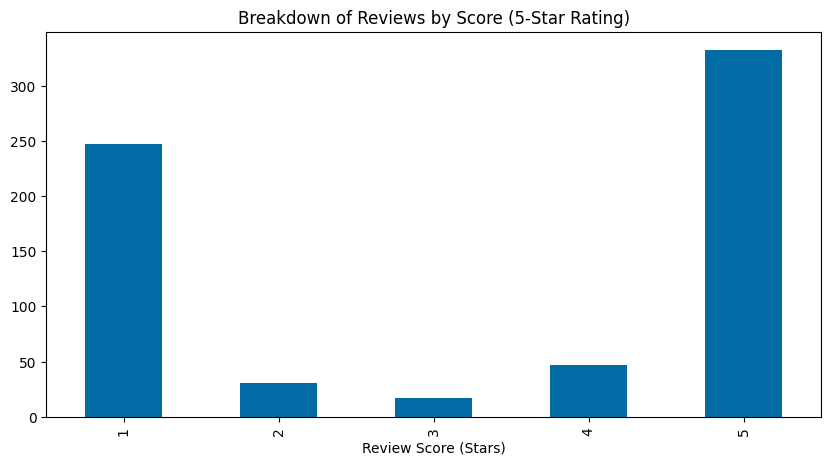

In [99]:
Score_plot = Scores.sort_index().plot(kind = 'bar',
                         title = "Breakdown of Reviews by Score (5-Star Rating)",
                        figsize = (10,5))
Score_plot.set_xlabel('Review Score (Stars)')
plt.show()

In [100]:
example = rev_all['Review'][0]
print(example)

I signed up, completed identity verification and KYC checks. Deposited some cash. After a week, they lock me out and force me to complete “selfie verification” again??? Then even more trivial, no matter what I do the error messages of “doesn’t match our records” always come up. Screw these neobanks, at least traditional banks don’t screw you over because they got laws to follow.


In [101]:
nltk.download('punkt')
sample_tokens = nltk.word_tokenize(example)
sample_tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['I',
 'signed',
 'up',
 ',',
 'completed',
 'identity',
 'verification',
 'and',
 'KYC',
 'checks']

In [102]:
nltk.download('averaged_perceptron_tagger')
sample_tagged = nltk.pos_tag(sample_tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [103]:
# Grouping tagged words into chunks of text
nltk.download('words')
nltk.download('maxent_ne_chunker')
entities = nltk.chunk.ne_chunk(sample_tagged)
entities.pprint()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


(S
  I/PRP
  signed/VBD
  up/RB
  ,/,
  completed/VBN
  identity/NN
  verification/NN
  and/CC
  (ORGANIZATION KYC/NNP)
  checks/NNS
  ./.
  Deposited/VBD
  some/DT
  cash/NN
  ./.
  After/IN
  a/DT
  week/NN
  ,/,
  they/PRP
  lock/VBP
  me/PRP
  out/IN
  and/CC
  force/VB
  me/PRP
  to/TO
  complete/VB
  “/NNP
  selfie/JJ
  verification/NN
  ”/NN
  again/RB
  ?/.
  ?/.
  ?/.
  Then/RB
  even/RB
  more/RBR
  trivial/JJ
  ,/,
  no/DT
  matter/NN
  what/WP
  I/PRP
  do/VBP
  the/DT
  error/NN
  messages/NNS
  of/IN
  “/NNP
  doesn/NN
  ’/NNP
  t/NN
  match/VB
  our/PRP$
  records/NNS
  ”/NNP
  always/RB
  come/VBP
  up/RP
  ./.
  (PERSON Screw/NNP)
  these/DT
  neobanks/NNS
  ,/,
  at/IN
  least/JJS
  traditional/JJ
  banks/NNS
  don/VBP
  ’/JJ
  t/NN
  screw/NN
  you/PRP
  over/IN
  because/IN
  they/PRP
  got/VBD
  laws/NNS
  to/TO
  follow/VB
  ./.)


In [104]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
import torch
from transformers import RobertaForSequenceClassification
from tqdm.notebook import tqdm

In [105]:
from transformers import pipeline
#https://huggingface.co/lxyuan/distilbert-base-multilingual-cased-sentiments-student

distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    top_k=None
)

In [106]:
output = distilled_student_sentiment_classifier(example)
print(output)

[[{'label': 'negative', 'score': 0.6973018646240234}, {'label': 'neutral', 'score': 0.201439768075943}, {'label': 'positive', 'score': 0.10125832259654999}]]


In [107]:
# Store results into dict
scores_dict = {
    'positive' : output[0][0]['score'],
    'neutral' : output[0][1]['score'],
    'negative' : output[0][2]['score']
}

In [108]:
def distilbert_scores(example):
    # Run distilbert on first example text
    output = distilled_student_sentiment_classifier(example)

    # Store results into dict
    scores_dict = {
    'positive' : output[0][0]['score'],
    'neutral' : output[0][1]['score'],
    'negative' : output[0][2]['score']
    }

    return scores_dict

In [109]:
res = {}
for i, row in tqdm(rev_all.iterrows(), total = len(rev_all)):

    # Running distilbert
    try:
        text_review = row['Review']
        num = row['No.']

        # Running distilbert
        res[num] = distilbert_scores(text_review)

    except RuntimeError:
        print(f'Broke for Review Number:{num}')

  0%|          | 0/674 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (602 > 512). Running this sequence through the model will result in indexing errors


Broke for Review Number:48


In [110]:
# Read into pandas DataFrame
res_df = pd.DataFrame.from_dict(res, orient='index')
df_merged2 = pd.concat([rev_all, res_df], axis=1, join="inner")

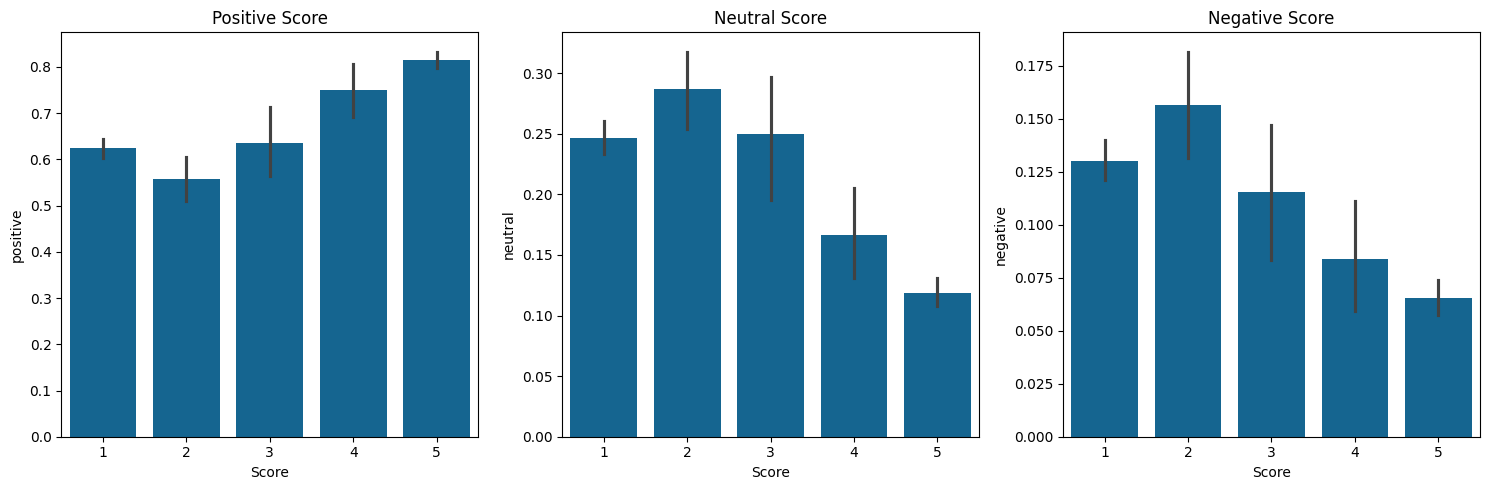

In [111]:
fig , axs = plt.subplots(1,3, figsize = (15,5))
sns.barplot(data = df_merged2, x = 'Score', y = 'positive', ax = axs[0])
sns.barplot(data = df_merged2, x = 'Score', y = 'neutral', ax = axs[1])
sns.barplot(data = df_merged2, x = 'Score', y = 'negative', ax = axs[2])
axs[0].set_title("Positive Score")
axs[1].set_title("Neutral Score")
axs[2].set_title("Negative Score")
plt.tight_layout()
plt.show()

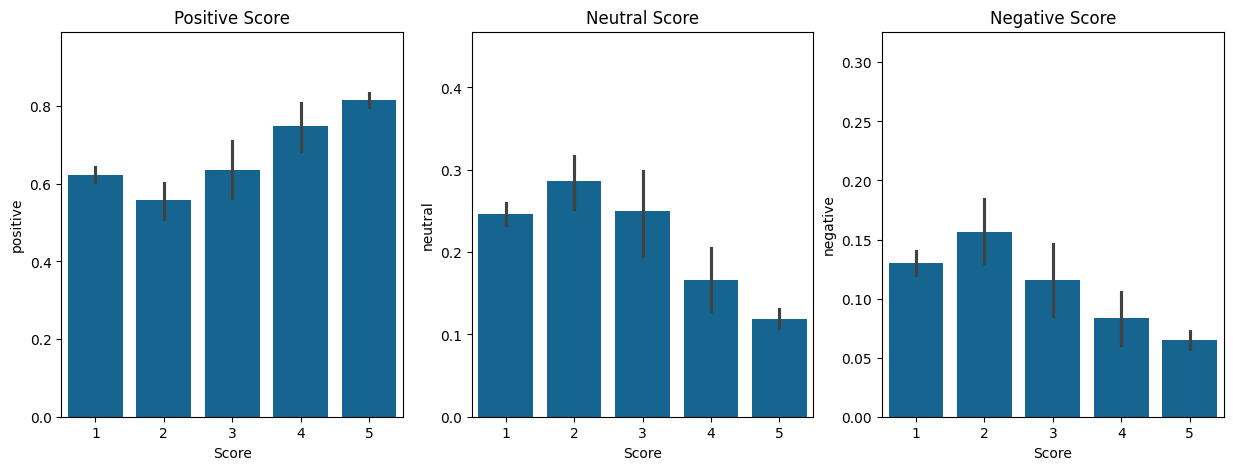

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the data and set common y-axis limits
sns.barplot(data=df_merged2, x='Score', y='positive', ax=axs[0])
axs[0].set_ylim(0, max(df_merged2['positive']))  # Set y-axis limit

sns.barplot(data=df_merged2, x='Score', y='neutral', ax=axs[1])
axs[1].set_ylim(0, max(df_merged2['neutral']))  # Set y-axis limit

sns.barplot(data=df_merged2, x='Score', y='negative', ax=axs[2])
axs[2].set_ylim(0, max(df_merged2['negative']))  # Set y-axis limit
axs[0].set_title("Positive Score")
axs[1].set_title("Neutral Score")
axs[2].set_title("Negative Score")
# Display the plot
plt.show()


In [113]:
df_merged2.query('Score == 1').sort_values('positive', ascending = False)['Review'].values[0]

'You guys are the worst! You ask for too much information and a picture of my official documents and a video and yada yada... What on earth is this bs?'

In [114]:
conditions = [
    (df_merged2['Score'] <= 2),
    (df_merged2['Score'] == 3 ),
    (df_merged2['Score'] >= 4)
]

values = ['Detractor', 'Passive', 'Promoter']

df_merged2['NPS category'] = np.select(conditions, values)
print(df_merged2.head())

             UserName                                             Review  \
0          steveawsum  I signed up, completed identity verification a...   
1            AlvaroAW  While the rest of the banks make it more diffi...   
2            channa_e  I was subscribed to metal and I wanted to clos...   
3          DavidChing     Had issue signing up twice. Go back to YouTrip   
4  Perry-the-Platypus  What a joke of an app that tries to help excha...   

   Score                 Date     Bank  No.  positive   neutral  negative  \
0      1  2024-03-08 05:51:31  Revolut    0  0.697302  0.201440  0.101258   
1      5  2024-03-08 02:33:09  Revolut    1  0.459572  0.311306  0.229122   
2      1  2024-03-03 15:05:39  Revolut    2  0.697560  0.200231  0.102209   
3      1  2024-03-03 13:18:10  Revolut    3  0.437498  0.331685  0.230817   
4      1  2024-03-01 10:06:53  Revolut    4  0.831215  0.095740  0.073046   

  NPS category  
0    Detractor  
1     Promoter  
2    Detractor  
3    Detract

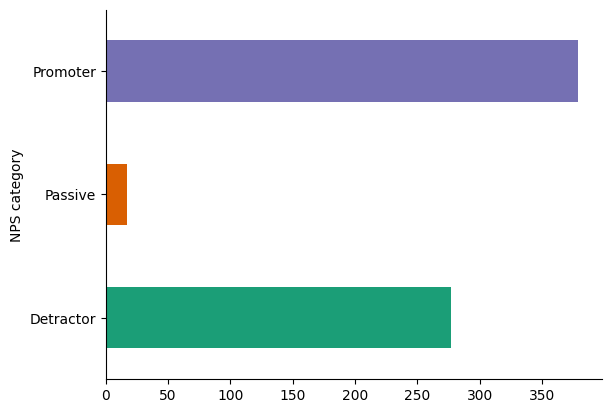

In [115]:
df_merged2.groupby('NPS category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [116]:
nps_res = df_merged2['NPS category'].value_counts(normalize=True)
print("NPS Score %:")
print((nps_res['Promoter'] - nps_res['Detractor']) *100)
print("Promoter:", nps_res['Promoter'] * 100)
print("Detractor:", nps_res['Detractor']*100)

NPS Score %:
15.156017830609214
Promoter: 56.315007429420504
Detractor: 41.15898959881129


relatively good promoter percentage so this bank is doing smth right

(-0.5, 399.5, 199.5, -0.5)

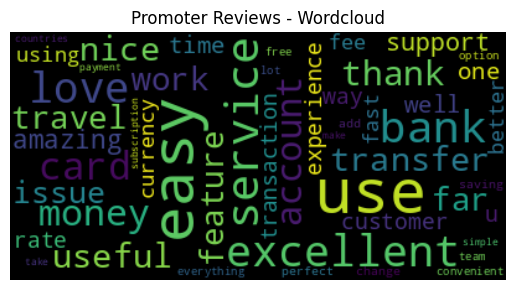

In [117]:
# Tokenization
from wordcloud import WordCloud, STOPWORDS
promoter_reviews = df_merged2['Review'][df_merged2["NPS category"] == 'Promoter']

promoter_reviews_tokenised = ""
for val in promoter_reviews:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    promoter_reviews_tokenised += " ".join(tokens)+" "
# Word Cloud
# https://medium.com/@harinisureshla/wordclouds-basics-of-nlp-5b60be226414
# Words to remove from the word cloud
words_to_remove = ["revolut", "app", "singapore", "banking","best","great","really","thumbs_up","day","guys","good","think","now"]

# Combine standard stopwords with custom words to remove
stop_words = set(list(STOPWORDS) + words_to_remove)
stop_words = ["revolut", "app", "singapore", "banking","best","great","really","thumbs_up","day","guys","good","think","now"]+ list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black", stopwords = stop_words).generate(str(promoter_reviews_tokenised))
plt.figure()
plt.title("Promoter Reviews - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")

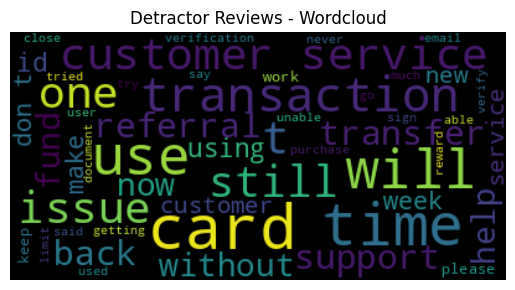

In [118]:
detractor_reviews = df_merged2['Review'][df_merged2["NPS category"] == 'Detractor']

detractor_reviews_tokenised = ""
for val in detractor_reviews:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    detractor_reviews_tokenised += " ".join(tokens)+" "

words_to_remove = ["account","days","even","revolut","s","need","bank","app","money","got","chat"]

# Combine standard stopwords with custom words to remove
stop_words = set(list(STOPWORDS) + words_to_remove)
stop_words =  words_to_remove+ list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black", stopwords = stop_words).generate(str(detractor_reviews_tokenised))
plt.figure()
plt.title("Detractor Reviews - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

n-gram count

In [119]:
df_merged2.columns

Index(['UserName', 'Review', 'Score', 'Date', 'Bank', 'No.', 'positive',
       'neutral', 'negative', 'NPS category'],
      dtype='object')

In [124]:
import re
from sklearn.feature_extraction.text import CountVectorizer

# Define a function to preprocess text
def preprocess_text(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove specific words mentioned
    words_to_remove = ['when', 'account', 'already']  # Add the words you want to remove
    for word in words_to_remove:
        text = text.replace(word, '')
    return text

# Assuming your dataset is stored in 'df' DataFrame
promoter_reviews = df_merged2[df_merged2["NPS category"] == "Promoter"]["Review"]
detractor_reviews = df_merged2[df_merged2["NPS category"] == "Detractor"]["Review"]

# Preprocess text in promoter reviews
promoter_reviews_preprocessed = [preprocess_text(review) for review in promoter_reviews]

# Preprocess text in detractor reviews
detractor_reviews_preprocessed = [preprocess_text(review) for review in detractor_reviews]

# Initialize CountVectorizer for unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(9, 10))

# Fit and transform promoter reviews
promoter_counts = vectorizer.fit_transform(promoter_reviews_preprocessed)
promoter_feature_names = vectorizer.get_feature_names_out()

# Fit and transform detractor reviews
detractor_counts = vectorizer.fit_transform(detractor_reviews_preprocessed)
detractor_feature_names = vectorizer.get_feature_names_out()

# Get counts for promoter and detractor
promoter_counts = promoter_counts.sum(axis=0)
detractor_counts = detractor_counts.sum(axis=0)

# Convert to lists for easier handling
promoter_counts = promoter_counts.tolist()[0]
detractor_counts = detractor_counts.tolist()[0]

# Combine feature names and counts into a dictionary
promoter_ngram_count = dict(zip(promoter_feature_names, promoter_counts))
detractor_ngram_count = dict(zip(detractor_feature_names, detractor_counts))

# Example usage:
print("Promoter N-gram Count:", promoter_ngram_count)
print("Detractor N-gram Count:", detractor_ngram_count)


Promoter N-gram Count: {'able to transfer money to loved ones overseas without': 1, 'able to transfer money to loved ones overseas without incurring': 1, 'able to use apple pay to top up my': 1, 'able to use apple pay to top up my card': 1, 'able transfer fund to most location no transaction fees': 1, 'able transfer fund to most location no transaction fees can': 1, 'about revolut this is what regular banking should have': 1, 'about revolut this is what regular banking should have been': 1, 'about their global insurance and the interaction with the': 1, 'about their global insurance and the interaction with the app': 1, 'abroad without fees revolut exchange rate is better than': 1, 'abroad without fees revolut exchange rate is better than paypal': 1, 'abroad without it upgraded recently to the black metal': 1, 'abroad without it upgraded recently to the black metal card': 1, 'absolutely love my revolut by far the coolest looking': 1, 'absolutely love my revolut by far the coolest looki

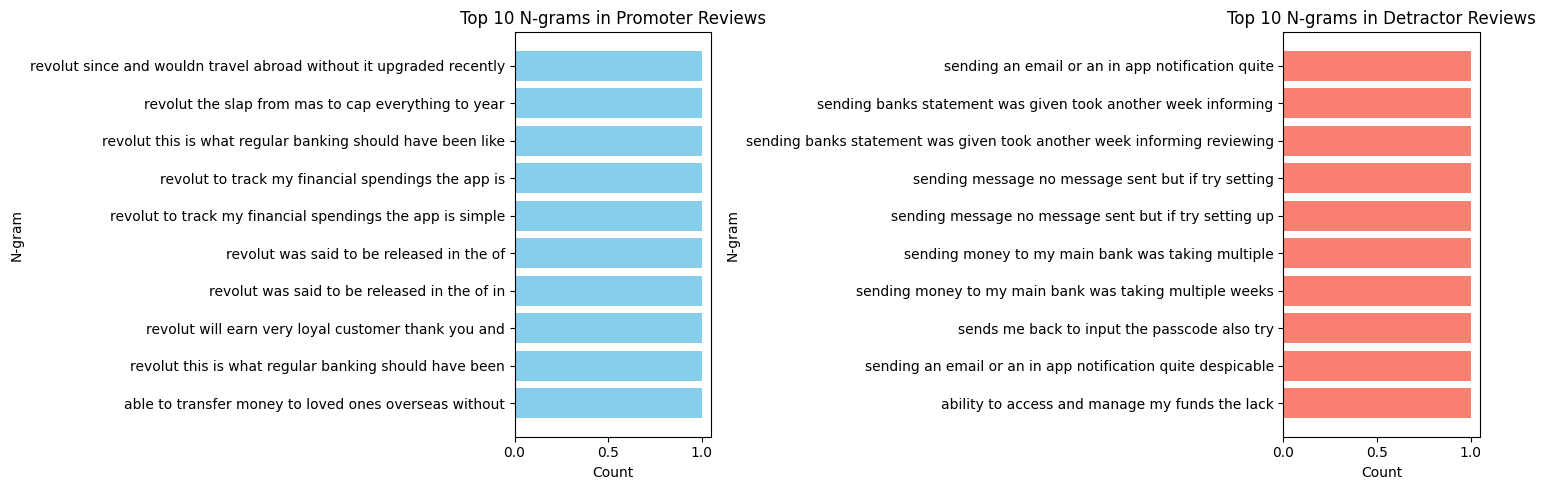

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have promoter_ngram_count and detractor_ngram_count dictionaries

# Convert n-gram count dictionaries to DataFrame
promoter_df = pd.DataFrame(list(promoter_ngram_count.items()), columns=['N-gram', 'Count'])
detractor_df = pd.DataFrame(list(detractor_ngram_count.items()), columns=['N-gram', 'Count'])

# Sort DataFrame by count in descending order
promoter_df = promoter_df.sort_values(by='Count', ascending=False).head(10)
detractor_df = detractor_df.sort_values(by='Count', ascending=False).head(10)

# Create subplots for promoter and detractor
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart for promoter
axs[0].barh(promoter_df['N-gram'], promoter_df['Count'], color='skyblue')
axs[0].set_title('Top 10 N-grams in Promoter Reviews')
axs[0].set_ylabel('N-gram')
axs[0].set_xlabel('Count')

# Bar chart for detractor
axs[1].barh(detractor_df['N-gram'], detractor_df['Count'], color='salmon')
axs[1].set_title('Top 10 N-grams in Detractor Reviews')
axs[1].set_ylabel('N-gram')
axs[1].set_xlabel('Count')

plt.tight_layout()
plt.show()



word cloud is better at conveting insight